In [45]:
import os, keras

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD, RMSprop
from keras.utils.np_utils import to_categorical

from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline

In [1]:
PROJECT_DIR  = '/home/ubuntu/Extracting-food-preferences'
PICTURES_DIR = '/home/ubuntu/Extracting-food-preferences/classification_with_pics'

In [2]:
PROJECT_DIR  = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences'
PICTURES_DIR = 'C:\\Users\\Natalia\\Documents\\GitHub\\Extracting-food-preferences\\classification_with_pics'

In [3]:
%cd $PROJECT_DIR

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences


In [6]:
# on remote Ubuntu machine (aws)

%cd $PICTURES_DIR

path = PICTURES_DIR #+ '/sample'
results_path=path + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

model_path = path + '/models/'
if not os.path.exists(model_path): os.mkdir(model_path)

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics


In [7]:
# on local home computer

%cd $PICTURES_DIR

path = PICTURES_DIR + '\\sample\\'
results_path=path + '\\results\\'
train_path=path + '\\train\\'
valid_path=path + '\\valid\\'

model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

C:\Users\Natalia\Documents\GitHub\Extracting-food-preferences\classification_with_pics


In [8]:
#Set constants
batch_size=25
no_of_epochs=1

In [13]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
generator = image.ImageDataGenerator()
val_batches = generator.flow_from_directory(valid_path, 
                                  target_size=(224,224), 
                                  class_mode='categorical',
                                  batch_size=batch_size, 
                                  shuffle=False)
batches     = generator.flow_from_directory(train_path, 
                                  target_size=(224,224), 
                                  class_mode='categorical',
                                  batch_size=batch_size, 
                                  shuffle=False)

Found 50 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [19]:
val_labels  = to_categorical(val_batches.classes)
trn_labels  = to_categorical(batches.classes)

In [23]:
vgg = VGG16(weights='imagenet')

In [29]:
start = datetime.now()

trn_features = vgg.predict_generator(batches, batches.nb_sample)
val_features = vgg.predict_generator(val_batches, val_batches.nb_sample)

end = datetime.now()
total = end - start
print('Time to run the script on GPU is {}'.format(total))

Time to run the script on GPU is 0:01:56.660469


In [36]:
# linear model on top of generated features
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
batch_size=5

In [38]:
history = lm.fit(trn_features, trn_labels, nb_epoch=5, batch_size=batch_size, 
       validation_data=(val_features, val_labels))

Train on 200 samples, validate on 50 samples
Epoch 1/5
200/200 [==============================] - 0s - loss: 0.6947 - acc: 0.5250 - val_loss: 0.6908 - val_acc: 0.6000
Epoch 2/5
200/200 [==============================] - 0s - loss: 0.6945 - acc: 0.5350 - val_loss: 0.6908 - val_acc: 0.6200
Epoch 3/5
200/200 [==============================] - 0s - loss: 0.6943 - acc: 0.5400 - val_loss: 0.6909 - val_acc: 0.6000
Epoch 4/5
200/200 [==============================] - 0s - loss: 0.6942 - acc: 0.5400 - val_loss: 0.6909 - val_acc: 0.6000
Epoch 5/5
200/200 [==============================] - 0s - loss: 0.6940 - acc: 0.5400 - val_loss: 0.6909 - val_acc: 0.6000


In [39]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 2)             2002        dense_input_1[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


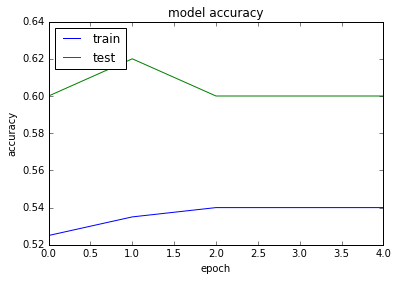

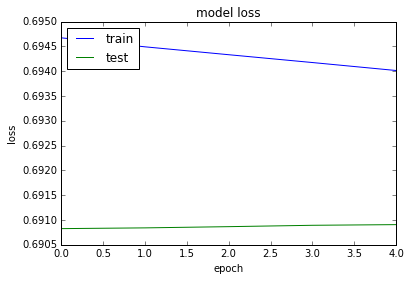

In [46]:
# history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()